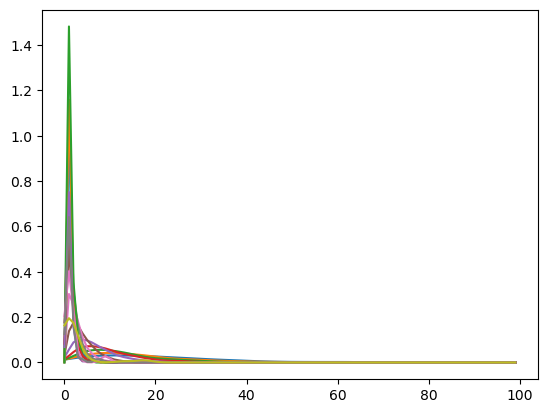

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('pickles\List_of_radial_object.pkl', 'rb') as f:
    loaded_radial_dist_list = pickle.load(f)

x=np.arange(0, 100,1)
for rd in loaded_radial_dist_list:
    plt.plot(rd.kde(x))


# they are save fine, but  now we ahve to do this for every point, 